In [572]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [573]:
df = pd.read_csv("C:/Users/user/AI-class-main/titanic.csv")

In [574]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [575]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [576]:
df['Embarked'].fillna('N', inplace=True)
df = df.dropna(axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [577]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis =1 )
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='count'>

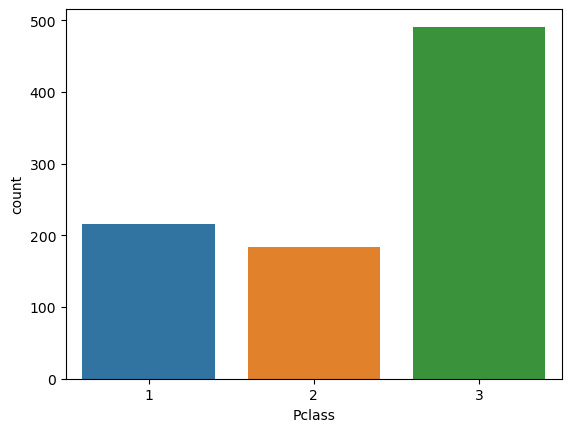

In [578]:
sns.countplot(data = df, x="Pclass")

In [579]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

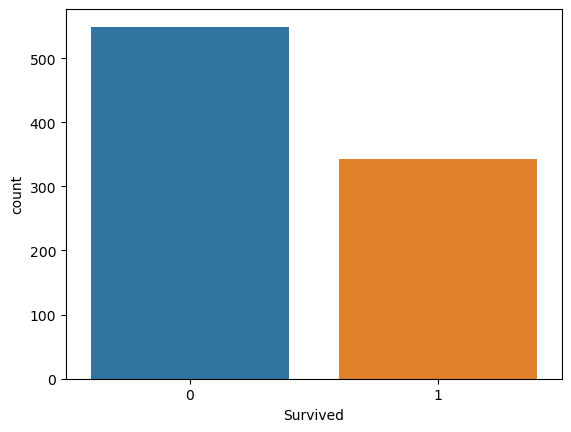

In [580]:
sns.countplot(data = df, x="Survived")

In [581]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

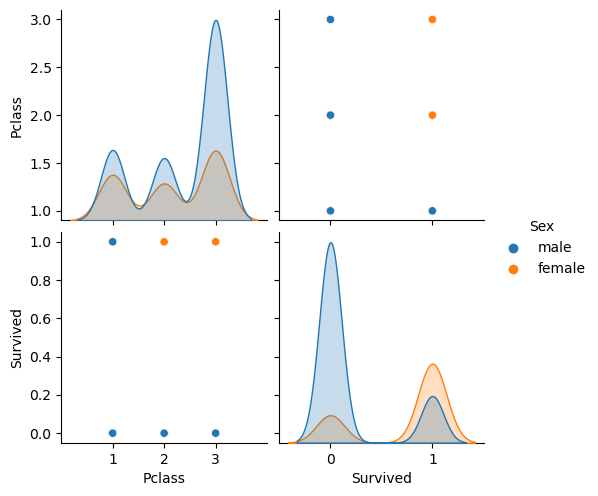

In [582]:
sns.pairplot(data=df, vars=['Pclass','Survived'], hue= 'Sex')

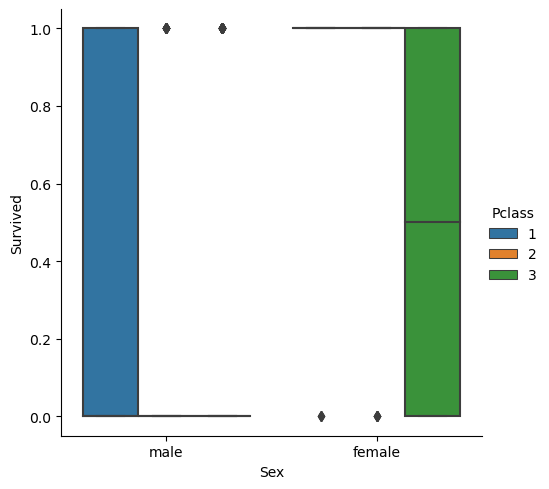

In [608]:
sns.catplot(data=df, hue  = 'Pclass',x = 'Sex', y ='Survived', kind='box')

In [584]:
X = df.drop('Survived', axis =1 )
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S
887,1,female,0,0,30.0000,S
888,3,female,1,2,23.4500,S
889,1,male,0,0,30.0000,C


In [585]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [586]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [587]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['Sex', 'Embarked']
for feature in features :
    X[feature] = le.fit_transform(X[feature])
    
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,1,0,7.2500,3
1,1,0,1,0,71.2833,0
2,3,0,0,0,7.9250,3
3,1,0,1,0,53.1000,3
4,3,1,0,0,8.0500,3


In [588]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [589]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [590]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [591]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7892376681614349
[[121  18]
 [ 29  55]]


In [592]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7937219730941704
[[118  21]
 [ 25  59]]


In [593]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8251121076233184
[[122  17]
 [ 22  62]]


In [598]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8251121076233184
[[120  19]
 [ 20  64]]


In [602]:
from sklearn.neighbors import KNeighborsClassifier

clf_kn = KNeighborsClassifier(n_neighbors=30)
clf_kn.fit(X_train, y_train)

pred_kn = clf_kn.predict(X_test)

print ("\n--- K Neighbors Classifier ---")
print (accuracy_score(y_test, pred_kn))
print (confusion_matrix(y_test, pred_kn))


--- K Neighbors Classifier ---
0.8251121076233184
[[127  12]
 [ 27  57]]
